In [12]:
#Libraries initialization
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as r
from collections import defaultdict
import scipy.sparse as sp

In [13]:
#Adjacency matrix initialization
r.seed(11)
matrix=np.zeros((100, 100))
n = 500

while n > 0:
    i = r.randint(0,99)
    j = r.randint(0,99)
    if i != j and matrix[i,j] != 1:
        numb = r.randint(1,100)
        matrix[i,j]=numb
        matrix[j,i]=numb
        n -= 1

print(matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 5.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]]


In [14]:
#Adjacency matrix to adjacency list
adjlist = defaultdict(list)
edges = set()
for i, v in enumerate(matrix, 1):
    for j, u in enumerate(v, 1):
        if u != 0 and frozenset([i, j]) not in edges:
            edges.add(frozenset([i, j]))
            adjlist[i].append(j)
print (adjlist)

defaultdict(<class 'list'>, {1: [27, 35, 49, 64, 65, 81], 2: [8, 10, 13, 43, 46, 48, 57, 74, 75, 77, 82, 88, 91, 92, 93], 3: [15, 34, 37, 39, 56, 59, 83, 84, 88, 100], 4: [5, 11, 38, 40, 47, 49, 54, 68, 77, 99], 5: [23, 25, 27, 36, 40, 52, 57, 62, 66, 76, 80], 6: [19, 23, 26, 50, 67, 80, 82, 87, 88, 95], 7: [28, 46, 50, 65, 69, 80, 81], 8: [23, 61, 67, 75, 77], 9: [17, 22, 28, 35, 62, 68, 73, 75, 92], 10: [11, 12, 18, 24, 29, 36, 47, 48, 62, 69, 83, 93, 97], 11: [17, 32, 42, 43, 54, 56, 59, 89, 91, 100], 12: [14, 17, 29, 43, 44, 62, 63, 69, 86, 88, 94, 98], 13: [26, 30, 50, 66, 67, 68, 75, 80, 82, 93, 98], 14: [18, 26, 41, 52, 58, 64, 79, 95], 15: [22, 59, 65, 82, 91, 94], 16: [19, 20, 21, 47, 59, 75, 92, 96, 98], 17: [26, 31, 34, 64, 76, 82, 99], 18: [31, 38, 43, 57, 58, 74, 76, 83], 19: [29, 32, 34, 60, 84, 87, 99], 20: [25, 50, 61, 70, 79, 83, 84], 21: [33, 40, 51, 73, 78, 79, 80, 82, 87, 95, 99, 100], 22: [47, 67, 88], 23: [24, 27, 63, 67, 73], 24: [25, 41, 51, 79, 81], 25: [26, 31

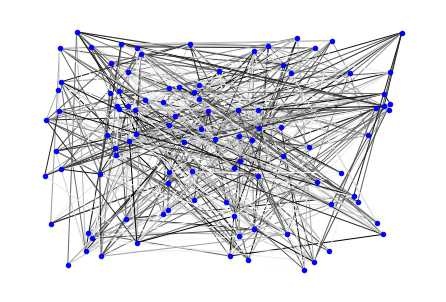

In [15]:
#Graph parameters
def get_matrix_triad(coo_matrix , data=False):
	if not sp.isspmatrix_coo(coo_matrix):
		coo_matrix = sp.coo_matrix(coo_matrix)
	temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
	return temp.tolist()
edags = get_matrix_triad(matrix)

#Graph visualization
G = nx.Graph()
H = nx.path_graph(matrix.shape[0])
G.add_nodes_from(H)
G.add_weighted_edges_from(edags)
colors = np.arange(matrix.shape[0])
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G,pos=nx.random_layout(G),node_color='b', node_size = 20, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Greys)
plt.show()

In [16]:
#Floyd algorythm test
Floyd_paths = nx.algorithms.shortest_paths.floyd_warshall(G, 'weight')
print('Floyd–Warshall algorithm result for the 39th node: \n'  + str(Floyd_paths[39]))
print('\nFloyd–Warshall algorithm can show the shortest path between 39th and 99th nodes: \n'  + str(Floyd_paths[39][99]))
print('\nOr the path between any other nodes, for example between 1st and 10th: \n'  + str(Floyd_paths[1][10]))

Floyd–Warshall algorithm result for the 39th node: 
defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x000001CC3CB58820>, {39: 0, 3: 55.0, 4: 3.0, 20: 19.0, 29: 39.0, 35: 33.0, 40.0: 18.0, 46.0: 68.0, 51.0: 10.0, 68.0: 34.0, 69.0: 11.0, 71.0: 20.0, 83.0: 58.0, 96.0: 37.0, 0: 59.0, 1: 33.0, 2: 46.0, 5: 55.0, 6: 54.0, 7: 63.0, 8: 54.0, 9: 40.0, 10: 28.0, 11: 43.0, 12: 34.0, 13: 24.0, 14: 83.0, 15: 62.0, 16: 68.0, 17: 36.0, 18: 63.0, 19: 60.0, 21: 89.0, 22: 50.0, 23: 45.0, 24: 30.0, 25: 31.0, 26: 54.0, 27: 47.0, 28: 47.0, 30: 53.0, 31: 31.0, 32: 60.0, 33: 42.0, 34: 57.0, 36: 40.0, 37: 53.0, 38: 58.0, 41: 49.0, 42: 64.0, 43: 70.0, 44: 64.0, 45: 81.0, 47: 72.0, 48: 47.0, 49: 43.0, 50: 49.0, 52: 19.0, 53: 21.0, 54: 46.0, 55: 63.0, 56: 44.0, 57: 39.0, 58: 35.0, 59: 57.0, 60: 57.0, 61: 44.0, 62: 37.0, 63: 58.0, 64: 55.0, 65: 36.0, 66: 53.0, 67: 46.0, 70: 41.0, 72: 27.0, 73: 52.0, 74: 45.0, 75: 6.0, 76: 75.0, 77: 33.0, 78: 58.0, 79: 17.0, 80: 

In [17]:
#Johnson algorythm test
Johnson_paths = nx.algorithms.shortest_paths.johnson(G, 'weight')
print('Johnson algorithm result for the 39th node: \n'  + str(Johnson_paths[39]))
print('\nJohnson algorithm can show the shortest path between 39th and 99th nodes: \n'  + str(Johnson_paths[39][99]))
print('\nOr the path between any other nodes, for example between 1st and 10th: \n'  + str(Johnson_paths[1][10]))

Johnson algorithm result for the 39th node: 
{39: [39], 3.0: [39, 4.0, 75.0, 90.0, 31.0, 49.0, 37.0, 3.0], 4.0: [39, 4.0], 20.0: [39, 4.0, 79.0, 20.0], 29.0: [39, 4.0, 79.0, 12.0, 29.0], 35.0: [39, 51.0, 35.0], 40.0: [39, 40.0], 46.0: [39, 46.0], 51.0: [39, 51.0], 68.0: [39, 4.0, 79.0, 52.0, 68.0], 69.0: [39, 69.0], 71.0: [39, 69.0, 71.0], 83.0: [39, 69.0, 71.0, 33.0, 56.0, 83.0], 96.0: [39, 4.0, 75.0, 90.0, 31.0, 96.0], 22.0: [39, 69.0, 72.0, 22.0], 24.0: [39, 4.0, 75.0, 24.0], 26.0: [39, 4.0, 75.0, 89.0, 27.0, 26.0], 56.0: [39, 69.0, 71.0, 33.0, 56.0], 61.0: [39, 4.0, 61.0], 65.0: [39, 4.0, 65.0], 75.0: [39, 4.0, 75.0], 79.0: [39, 4.0, 79.0], 16.0: [39, 4.0, 75.0, 16.0], 17.0: [39, 4.0, 75.0, 17.0], 25.0: [39, 69.0, 72.0, 25.0], 89.0: [39, 4.0, 75.0, 89.0], 90.0: [39, 4.0, 75.0, 90.0], 95.0: [39, 4.0, 79.0, 53.0, 50.0, 95.0], 13.0: [39, 51.0, 13.0], 41.0: [39, 4.0, 75.0, 90.0, 31.0, 57.0, 41.0], 43.0: [39, 4.0, 75.0, 24.0, 43.0], 58.0: [39, 51.0, 58.0], 67.0: [39, 69.0, 67.0], 72.0: 

In [42]:
import timeit
from scipy.optimize import curve_fit

def fw_timestamps(n_runs, n_experiments):
    timestamps = []
    for runs in range(n_runs):
        timestamps.append([])
        for experiments in range(5, n_experiments + 1):
            
            matrix=np.zeros((experiments, experiments))
            n = experiments * 5

            while n > 0:
                i = r.randint(0,experiments-1)
                j = r.randint(0,experiments-1)
                if i != j and matrix[i,j] != 1:
                    numb = r.randint(1,100)
                    matrix[i,j]=numb
                    matrix[j,i]=numb
                    n -= 1

            adjlist = defaultdict(list)
            edges = set()
            for i, v in enumerate(matrix, 1):
                for j, u in enumerate(v, 1):
                    if u != 0 and frozenset([i, j]) not in edges:
                        edges.add(frozenset([i, j]))
                        adjlist[i].append(j)

            def get_matrix_triad(coo_matrix , data=False):
                if not sp.isspmatrix_coo(coo_matrix):
                    coo_matrix = sp.coo_matrix(coo_matrix)
                temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
                return temp.tolist()
            edags = get_matrix_triad(matrix)
            
            G = nx.Graph()
            H = nx.path_graph(matrix.shape[0])
            G.add_nodes_from(H)
            G.add_weighted_edges_from(edags)

            start_time = timeit.default_timer()
            nx.algorithms.shortest_paths.floyd_warshall(G, 'weight')
            timestamps[runs].append(timeit.default_timer() - start_time)
    timestamps_mean = np.array(timestamps, dtype=np.float64).mean(axis=0)
    return timestamps_mean

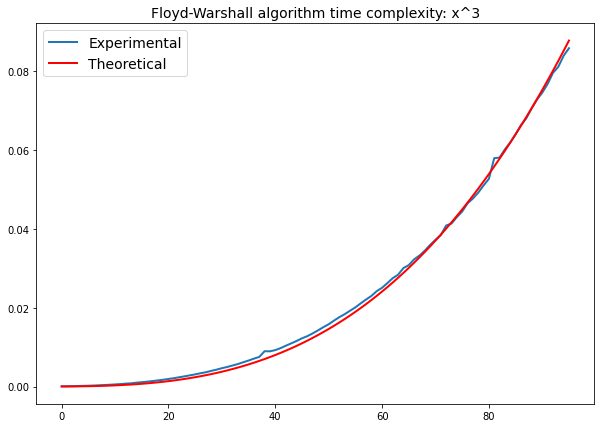

In [51]:
def cubic_function(x, a):
    return a * x ** 3

avg_time = fw_timestamps(5, 100)

xdata = np.arange(5, len(avg_time)+5, dtype=np.float64)
ydata = np.array(avg_time, dtype=np.float64)
popt, pcov = curve_fit(cubic_function, xdata, ydata)

plt.figure(figsize=(10,7))
plt.plot(avg_time, linewidth=2)
plt.title("Floyd-Warshall algorithm time complexity: x^3", fontsize=14)
plt.plot(xdata-5, cubic_function(xdata, *popt), 'r', linewidth=2)
plt.legend(["Experimental", "Theoretical"], fontsize=14)
plt.show()

In [20]:
def johnson_timestamps(n_runs, n_experiments):
    timestamps = []
    for runs in range(n_runs):
        timestamps.append([])
        for experiments in range(5, n_experiments + 1):
            
            matrix=np.zeros((experiments, experiments))
            n = experiments * 5

            while n > 0:
                i = r.randint(0,experiments-1)
                j = r.randint(0,experiments-1)
                if i != j and matrix[i,j] != 1:
                    numb = r.randint(1,100)
                    matrix[i,j]=numb
                    matrix[j,i]=numb
                    n -= 1

            adjlist = defaultdict(list)
            edges = set()
            for i, v in enumerate(matrix, 1):
                for j, u in enumerate(v, 1):
                    if u != 0 and frozenset([i, j]) not in edges:
                        edges.add(frozenset([i, j]))
                        adjlist[i].append(j)

            def get_matrix_triad(coo_matrix , data=False):
                if not sp.isspmatrix_coo(coo_matrix):
                    coo_matrix = sp.coo_matrix(coo_matrix)
                temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
                return temp.tolist()
            edags = get_matrix_triad(matrix)
            
            G = nx.Graph()
            H = nx.path_graph(matrix.shape[0])
            G.add_nodes_from(H)
            G.add_weighted_edges_from(edags)

            start_time = timeit.default_timer()
            nx.algorithms.shortest_paths.johnson(G, 'weight')
            timestamps[runs].append(timeit.default_timer() - start_time)
    timestamps_mean = np.array(timestamps, dtype=np.float64).mean(axis=0)
    return timestamps_mean

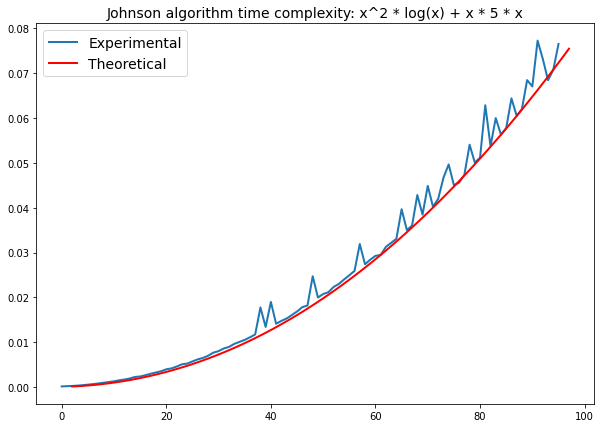

In [50]:
def special_function(x, a):
    return a * (x ** 2 * np.log(x) + x * 5 * x)

avg_time = johnson_timestamps(5, 100)

xdata = np.arange(5, len(avg_time)+5, dtype=np.float64)
ydata = np.array(avg_time, dtype=np.float64)
popt, pcov = curve_fit(special_function, xdata, ydata)

plt.figure(figsize=(10,7))
plt.plot(avg_time, linewidth=2)
plt.title("Johnson algorithm time complexity: x^2 * log(x) + x * 5 * x", fontsize=14)
plt.plot(xdata-3, special_function(xdata, *popt), 'r', linewidth=2)
plt.legend(["Experimental", "Theoretical"], fontsize=14)
plt.show()